# Exercise 3: Optimizers (CNN)

In [30]:
import torch
from torch.nn import Module
from torch import nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [36]:
class CNNetwork(Module):
    def __init__(self, input_channels):
        super(CNNetwork, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 10, kernel_size = 5)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(10, 30, kernel_size = 5)
        self.conv3 = nn.Conv2d(30, 60, kernel_size = 5)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc1 = nn.Linear(540, 270)
        self.fc2 = nn.Linear(270, 130)
        self.fc3 = nn.Linear(130, 10)
        

    def forward(self, x):
        y = F.relu(self.conv1(x))
        y = self.pool1(y)
        y = F.relu(self.conv2(y))
        y = F.relu(self.conv3(y))
        y = self.pool2(y)
        y = y.view(-1, 60*3*3)
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        y = self.fc3(y)
        return y

In [37]:
CifarTrain = torchvision.datasets.CIFAR10(root = './data', train = True, transform = transforms.ToTensor(), download = True)
CifarTest = torchvision.datasets.CIFAR10(root = './data', train = False, transform = transforms.ToTensor(), download = True)

Files already downloaded and verified
Files already downloaded and verified


In [47]:
batch_size = 128
epochs = 10
train_loader = DataLoader(CifarTrain, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(CifarTest, batch_size = 64, shuffle = True)
learningRate = [0.01, 0.001, 0.0001]

# Adam Optimizer

In [48]:
for learning_rate in learningRate:
    Model = CNNetwork(3)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(Model.parameters(),lr = learning_rate)
    writer = SummaryWriter(f'runs/Cifar/Adam {+ learning_rate}')
    step = 0
    for epoch in range(epochs):
        total_loss = 0
        correct_pred = 0
        sample_size = 0
        for i, batch in enumerate(train_loader):
            optimizer.zero_grad()
            yhat = Model(batch[0])
            loss = criterion(yhat.squeeze(), batch[1].squeeze())
            total_loss += loss.item()
            pred = torch.max(yhat.data, 1)[1]
            sample_size = batch[1].size(0)
            correct_pred += (pred == batch[1]).sum().item()
            loss.backward()
            optimizer.step() 
            if (i + 1) % 50 == 0:
                writer.add_scalar('Loss on Minibatches', loss.item(), step + 1)
                writer.add_scalar('Accuracy on minibatches',((pred == batch[1]).sum().item()/sample_size)*100 , 
                                  step + 1)
                step += 1
        
        accuracy = (correct_pred/len(CifarTrain))*100
        writer.add_scalar('Train Loss', np.sqrt(total_loss/len(CifarTrain)), epoch + 1)
        writer.add_scalar('Train accuracy', accuracy, epoch + 1)

        with torch.no_grad():
            test_pred = 0
            test_loss = 0
            for i, (img, label) in enumerate(test_loader):
                optimizer.zero_grad()
                output = Model(img)
                loss = criterion(output.squeeze(), label.squeeze())
                test_loss += loss.item()
                pred = torch.max(output.data, 1)[1]
                test_pred += (pred == label).sum().item()
            accuracy = (test_pred/len(CifarTest))*100   
            writer.add_scalar('Test Loss', np.sqrt(test_loss/len(CifarTest)), epoch + 1)
            writer.add_scalar('Test accuracy', accuracy, epoch + 1)

    writer.close()
    writer.flush()

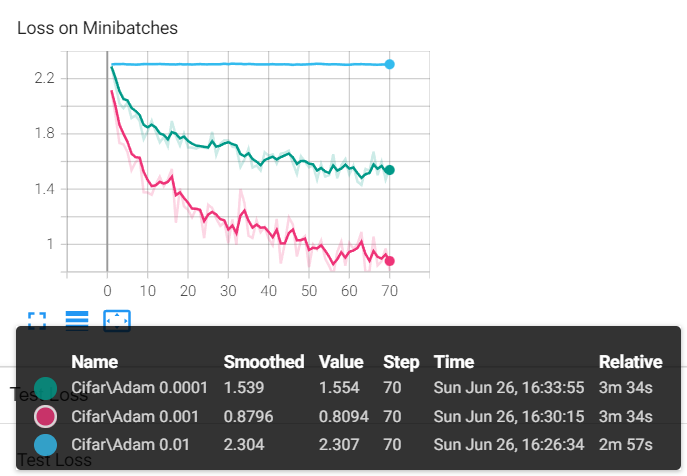

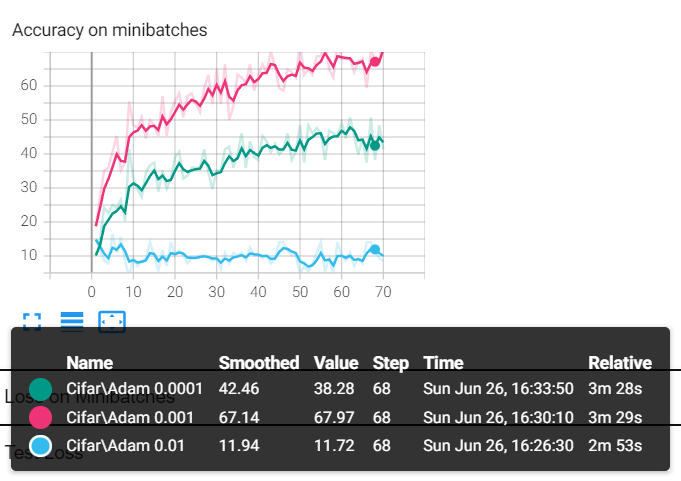

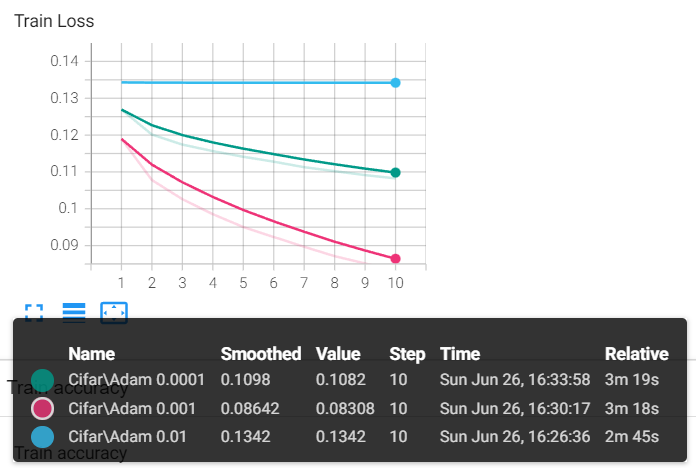

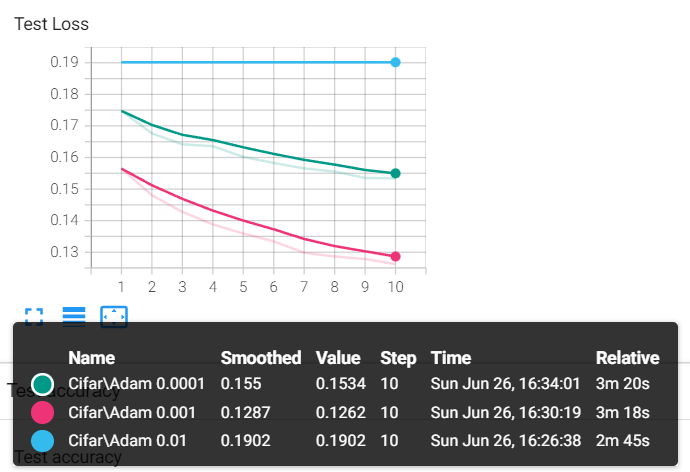

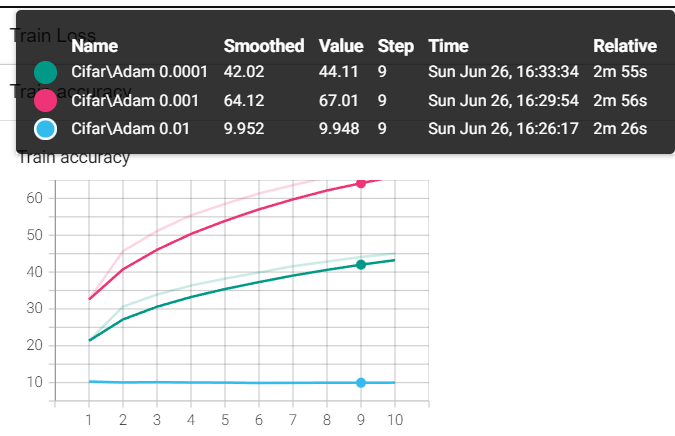

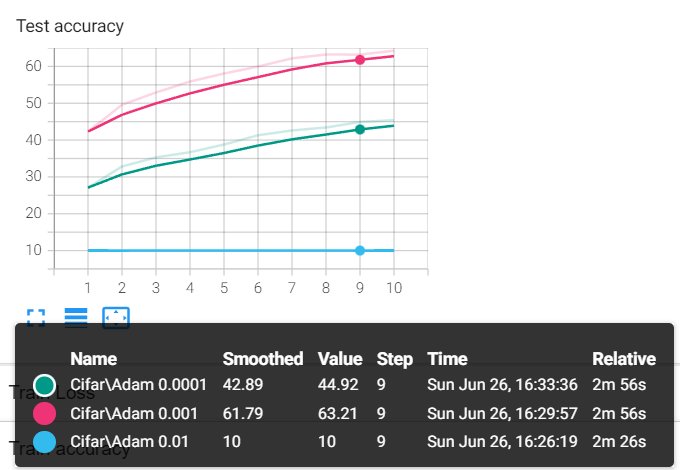

# SGD Optimizer

In [49]:
for learning_rate in learningRate:
    Model = CNNetwork(3)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(Model.parameters(),lr = learning_rate)
    writer = SummaryWriter(f'runs/Cifar/SGD {+ learning_rate}')
    step = 0
    for epoch in range(epochs):
        total_loss = 0
        correct_pred = 0
        sample_size = 0
        for i, batch in enumerate(train_loader):
            optimizer.zero_grad()
            yhat = Model(batch[0])
            loss = criterion(yhat.squeeze(), batch[1].squeeze())
            total_loss += loss.item()
            pred = torch.max(yhat.data, 1)[1]
            sample_size = batch[1].size(0)
            correct_pred += (pred == batch[1]).sum().item()
            loss.backward()
            optimizer.step() 
            if (i + 1) % 50 == 0:
                writer.add_scalar('Loss on Minibatches', loss.item(), step + 1)
                writer.add_scalar('Accuracy on minibatches',((pred == batch[1]).sum().item()/sample_size)*100 , 
                                  step + 1)
                step += 1
        
        accuracy = (correct_pred/len(CifarTrain))*100
        writer.add_scalar('Train Loss', np.sqrt(total_loss/len(CifarTrain)), epoch + 1)
        writer.add_scalar('Train accuracy', accuracy, epoch + 1)

        with torch.no_grad():
            test_pred = 0
            test_loss = 0
            for i, (img, label) in enumerate(test_loader):
                optimizer.zero_grad()
                output = Model(img)
                loss = criterion(output.squeeze(), label.squeeze())
                test_loss += loss.item()
                pred = torch.max(output.data, 1)[1]
                test_pred += (pred == label).sum().item()
            accuracy = (test_pred/len(CifarTest))*100   
            writer.add_scalar('Test Loss', np.sqrt(test_loss/len(CifarTest)), epoch + 1)
            writer.add_scalar('Test accuracy', accuracy, epoch + 1)

    writer.close()
    writer.flush()

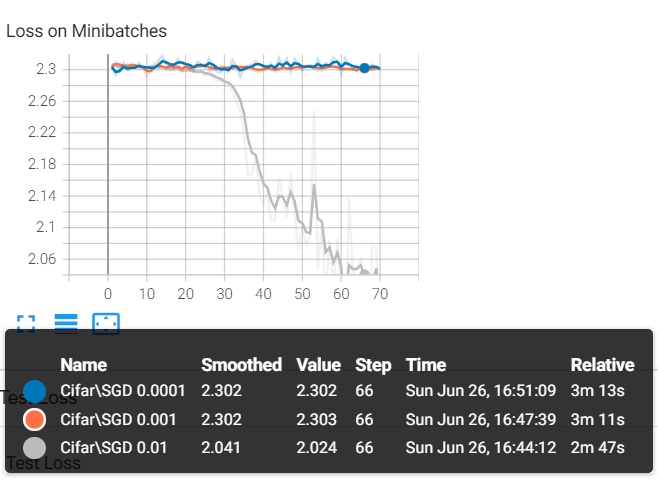

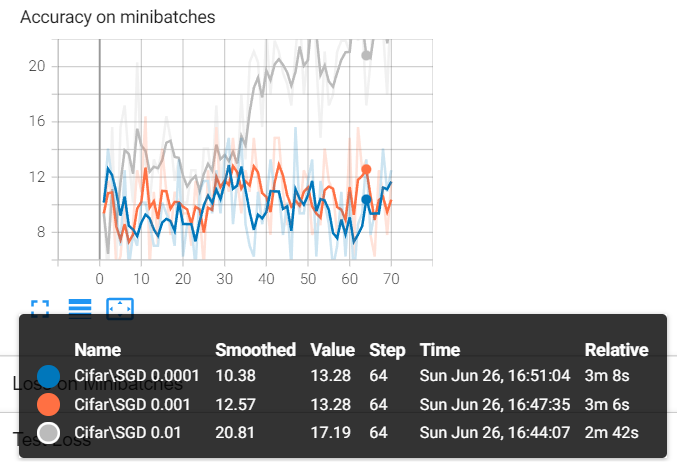

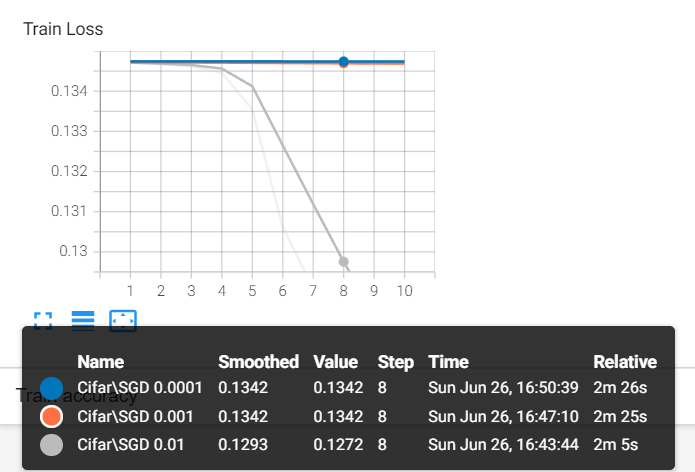

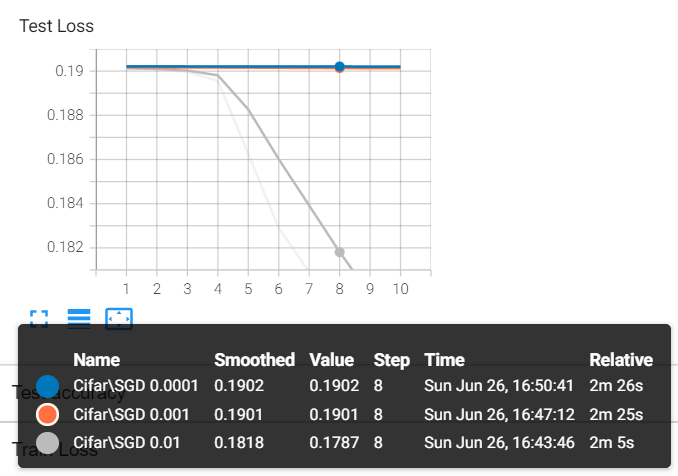

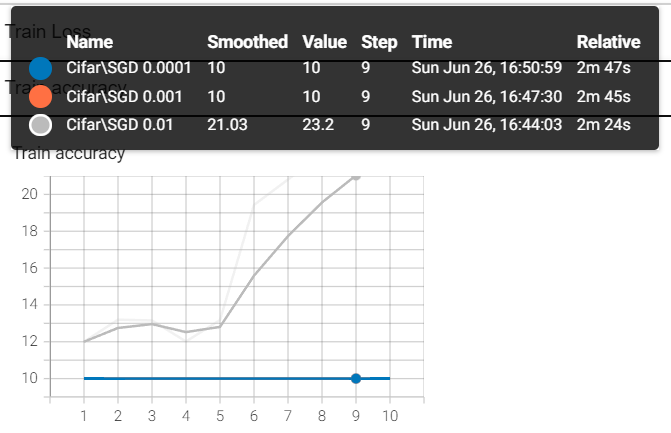

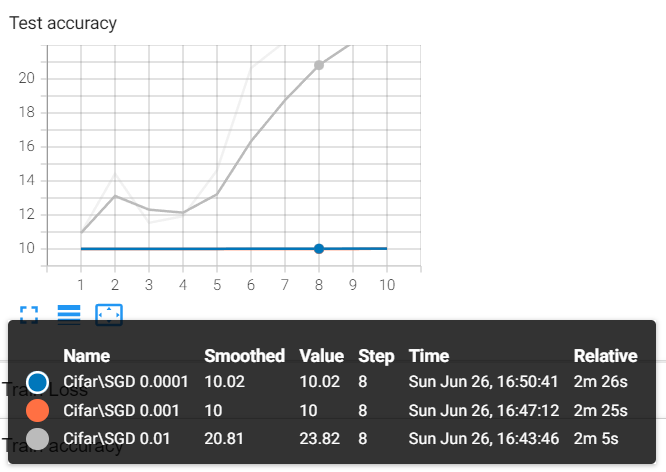